In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **1. Data Preparation**

In [ ]:
# Load the dataset
df = pd.read_csv('learning_data.csv')
df_eda = df.copy() # Copy for EDA plots

## a. Handle missing values

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 student_id               0
age                      0
gender                   0
course_type              0
session_count            0
avg_session_duration     0
quiz_attempts            0
assignments_submitted    0
satisfaction_rating      0
dropout                  0
dtype: int64


No missing values found.

## b. Drop irrelevant columns like student_id

In [ ]:
df = df.drop(['student_id'], axis=1)

## c. Convert categorical variables using appropriate encoding

In [ ]:
df = pd.get_dummies(df, columns=['gender', 'course_type'], drop_first=True)

In [ ]:
df

,age,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout,gender_Male,gender_Other,course_type_Python,course_type_UI/UX
0,24,11,108.13,7,5,5,0,True,False,False,True
1,37,9,59.51,3,1,1,1,True,False,True,False
2,32,15,81.77,3,3,1,1,True,False,False,True
3,28,7,24.82,4,4,1,1,False,False,False,False
4,25,5,27.11,7,1,4,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
195,19,3,113.94,5,1,1,1,False,False,True,False
196,38,7,22.64,1,5,4,1,False,False,False,True
197,29,3,72.42,0,4,4,1,False,False,False,True
198,23,23,63.18,4,0,5,0,False,True,False,False


## d. Scale or normalise numerical features

In [ ]:
numerical_cols = ['age', 'session_count', 'avg_session_duration', 'quiz_attempts',
                  'assignments_submitted', 'satisfaction_rating']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df

,age,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout,gender_Male,gender_Other,course_type_Python,course_type_UI/UX
0,-0.600994,-0.384722,1.543930,0.937751,1.526562,1.356727,0,True,False,False,True
1,1.428337,-0.610036,0.011029,-0.461877,-0.804067,-1.484586,1,True,False,True,False
2,0.647825,0.065904,0.712846,-0.461877,0.361247,-1.484586,1,True,False,False,True
3,0.023415,-0.835349,-1.082685,-0.111970,0.943905,-1.484586,1,False,False,False,False
4,-0.444892,-1.060662,-1.010485,0.937751,-0.804067,0.646399,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
195,-1.381506,-1.285976,1.727109,0.237937,-0.804067,-1.484586,1,False,False,True,False
196,1.584439,-0.835349,-1.151416,-1.161692,1.526562,0.646399,1,False,False,False,True
197,0.179518,-1.285976,0.418058,-1.511599,0.943905,0.646399,1,False,False,False,True
198,-0.757097,0.967157,0.126737,-0.111970,-1.386724,1.356727,0,False,True,False,False


# **2. Exploratory Data Analysis (EDA)**

## a. Correlation with dropout

In [ ]:
corr_matrix = df.corr()
dropout_corr = corr_matrix['dropout'].sort_values(ascending=False)
print("Correlations with dropout (excluding dropout itself):")
for feature, corr in dropout_corr.drop('dropout').items():
    print(f"{feature}: {corr:.4f}")

Correlations with dropout (excluding dropout itself):
age: 0.1164
course_type_Python: 0.0747
assignments_submitted: 0.0649
avg_session_duration: 0.0516
gender_Other: -0.0038
course_type_UI/UX: -0.0223
gender_Male: -0.0720
quiz_attempts: -0.0737
satisfaction_rating: -0.3321
session_count: -0.4759


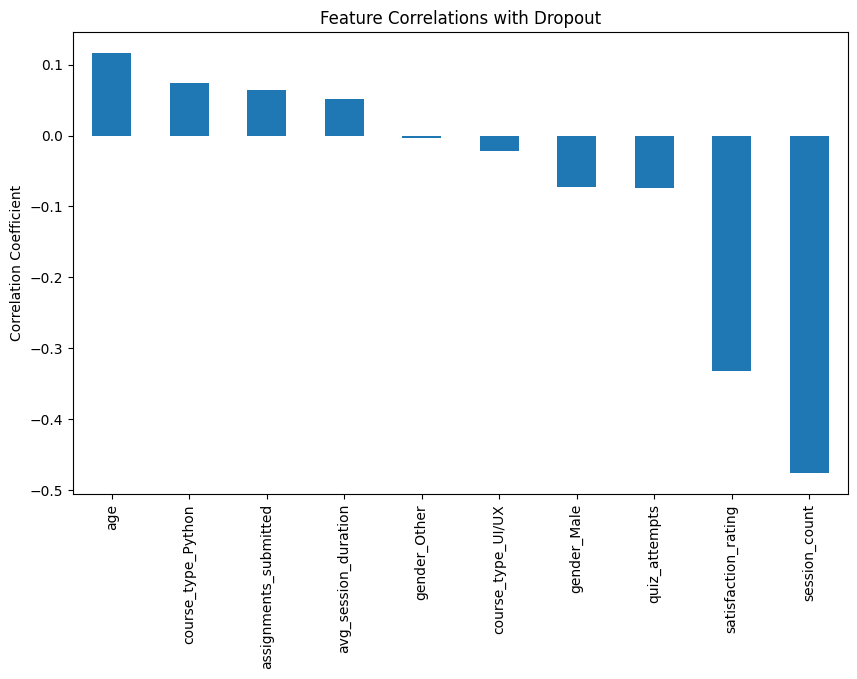

In [ ]:
# Plot feature correlations with dropout
plt.figure(figsize=(10, 6))
dropout_corr.drop('dropout').plot(kind='bar')
plt.title('Feature Correlations with Dropout')
plt.ylabel('Correlation Coefficient')
plt.show()

## b. Dropout rates across categories

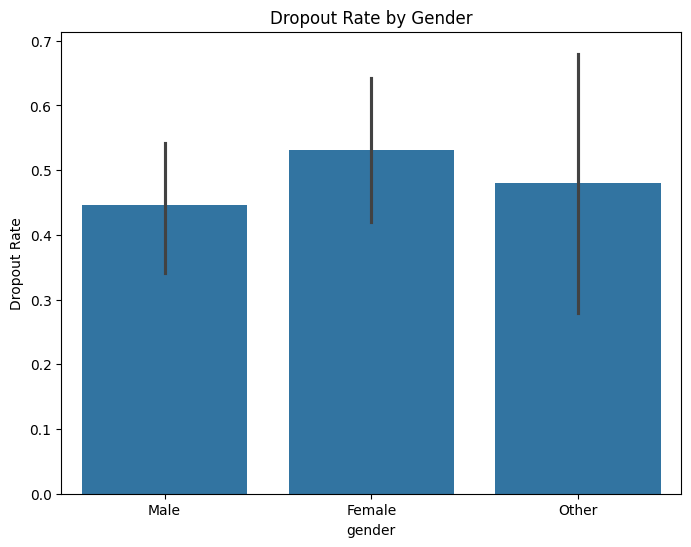

In [ ]:
# Bar plot: Dropout by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='dropout', data=df_eda)
plt.title('Dropout Rate by Gender')
plt.ylabel('Dropout Rate')
plt.show()

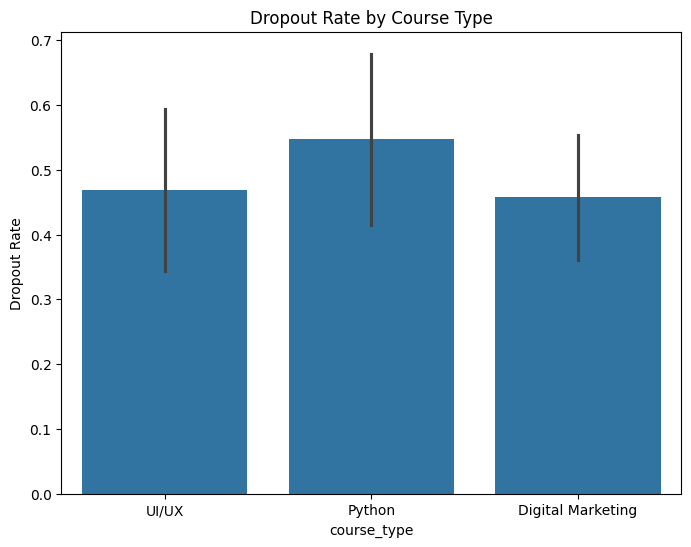

In [ ]:
# Bar plot: Dropout by course_type
plt.figure(figsize=(8, 6))
sns.barplot(x='course_type', y='dropout', data=df_eda)
plt.title('Dropout Rate by Course Type')
plt.ylabel('Dropout Rate')
plt.show()

## c. Trends observation

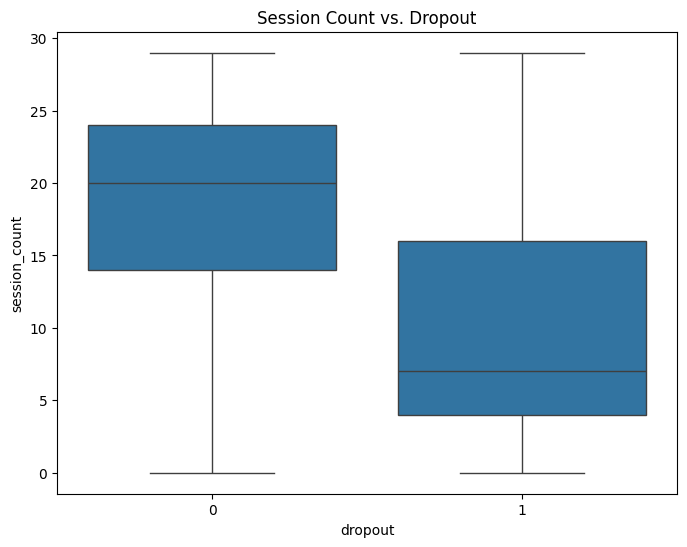

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='dropout', y='session_count', data=df_eda)
plt.title('Session Count vs. Dropout')
plt.show()

It can be seen that lower session count means higher droupout.

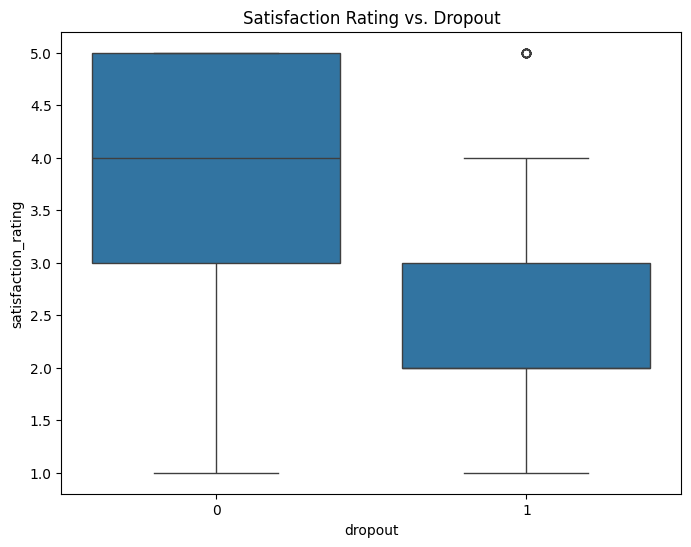

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='dropout', y='satisfaction_rating', data=df_eda)
plt.title('Satisfaction Rating vs. Dropout')
plt.show()

It can be seen that lower session rating means higher droupout.

# **3. Model Development**

In [ ]:
# Define features and target
X = df.drop(['dropout'], axis=1)
y = df['dropout']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")

##a. Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


Logistic Regression:
Accuracy: 0.7750
Precision: 0.7000
Recall: 0.8235
F1-Score: 0.7568
ROC-AUC: 0.7813


## b. Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")


Decision Tree:
Accuracy: 0.8250
Precision: 0.7778
Recall: 0.8235
F1-Score: 0.8000
ROC-AUC: 0.8248


## c. Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")


Random Forest:
Accuracy: 0.8250
Precision: 0.7273
Recall: 0.9412
F1-Score: 0.8205
ROC-AUC: 0.8402


## d. XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


XGBoost:
Accuracy: 0.8250
Precision: 0.7778
Recall: 0.8235
F1-Score: 0.8000
ROC-AUC: 0.8248


## e. SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "SVM")


SVM:
Accuracy: 0.7500
Precision: 0.6522
Recall: 0.8824
F1-Score: 0.7500
ROC-AUC: 0.7673


# **Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('learning_data.csv')
df = pd.get_dummies(df, columns=['gender', 'course_type'], drop_first=True)
numerical_cols = ['age', 'session_count', 'avg_session_duration', 'quiz_attempts',
                  'assignments_submitted', 'satisfaction_rating']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
X = df.drop(['student_id', 'dropout'], axis=1)
y = df['dropout']

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True)
}

In [ ]:
# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{name} - F1-Score: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression - F1-Score: 0.7389 (+/- 0.0709)
Decision Tree - F1-Score: 0.7989 (+/- 0.0738)
Random Forest - F1-Score: 0.8564 (+/- 0.0438)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1-Score: 0.8195 (+/- 0.0629)
SVM - F1-Score: 0.8130 (+/- 0.0570)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The cross-validation results clearly favor Random Forest as the best-performing model with an F1-Score of 0.8564 (±0.0438), followed closely by XGBoost and SVM. Logistic Regression and Decision Tree are less effective for this task. Focusing on Random Forest with additional optimization is the recommended path forward.

# **Feature Importance for Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model (replace X and y with your data)
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

age: 0.0925
session_count: 0.3799
avg_session_duration: 0.1225
quiz_attempts: 0.0692
assignments_submitted: 0.0566
satisfaction_rating: 0.2180
gender_Male: 0.0190
gender_Other: 0.0071
course_type_Python: 0.0158
course_type_UI/UX: 0.0195


It can be seen that session_count: 0.3799 (38.0%) and satisfaction_rating: 0.2180 (21.8%) are the key features.

# **Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Updated parameter grid with valid 'max_features' options
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Replaced 'auto' with valid options
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)  # Replace X and y with your actual data

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Best F1-Score: 0.8755890784042558
